# Introduction to neural networks with scikit-learn: ASEN 6337

**2017-09-12**

Teaching material from: *[Max Joseph](mailto:maxwell.b.joseph@colorado.edu), Earth Lab Analytics Hub, CU Boulder*


In this lab, you will use the sci-kit learn package to explore the behavior of neural networks in practice. 
You will investigate neural networks as universal function approximators, by trying to "learn" the pythagorean theorem as a regression task. 

## Neural networks as universal function approximators

Can a neural network learn the Pythagorean Theorem? 

![](https://mathblog.com/wp-content/uploads/2017/03/Pythagorean-Theorem.jpeg)

Neural networks are often considered to be able to represent a wide variety of continuous functions over subsets of $\mathbb{R}^n$ (see the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).
Let's try to learn that the length of a hypotenuse is $c = \sqrt{a^2 + b^2}$, by simulating an empirical data set. 

Imagine that you go out in the world and make many measurements on right triangles, where you measure the input values $a$ and $b$, with an output value $c$, the length of the hypotenuse. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network

Below, we will define a helper function that simulates this dataset, where we have $n$ observations, the inputs $X$ are stored in an $n \times 2$ array, and the ouput values $y$ are stored in a length $n$ vector.

In [2]:
def simulate_data(n, xmin=0, xmax=1):
    xvals = np.random.uniform(low=xmin, high=xmax, size=n*2)
    X = xvals.reshape((n, 2))
    y = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    return X, y

In [3]:
X, y = simulate_data(n=5000, xmin=0, xmax=1)

Now, let's visualize the results. The x-axis below is the value of $a$, the y-axis will be $b$, and the color indicates $c$. 

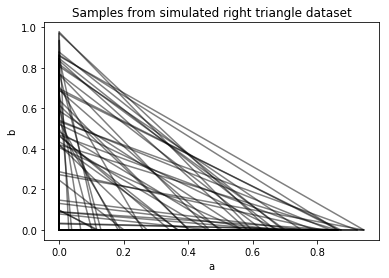

In [4]:
# show a subset of all of the generated right triangles
num_to_plot = 50
to_plot = np.random.choice(len(y), size = num_to_plot)

for i in to_plot:
    plt.plot([X[i, 0], 0], [0, X[i, 1]], alpha = 0.5, c='k')
    plt.plot([X[i, 0], 0], [0, 0], alpha = 0.5, c='k')
    plt.plot([0, 0], [0, X[i, 1]], alpha = 0.5, c='k')

plt.title("Samples from simulated right triangle dataset")
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Below, we use the [`sklearn.neural_network.MLPRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) class to initialize a neural net object, then use the `fit` method to train the model.

In [5]:
# define your neural network, calling the object 'net'
net = sklearn.neural_network.MLPRegressor(
            hidden_layer_sizes=(20,), 
            activation = 'relu', 
            solver = 'sgd', 
            alpha = 0, 
            verbose = True)

# use net.fit to train your model
net.fit(X, y)

Iteration 1, loss = 0.47224562
Iteration 2, loss = 0.07194525
Iteration 3, loss = 0.03826740
Iteration 4, loss = 0.03654846
Iteration 5, loss = 0.03494342
Iteration 6, loss = 0.03346175
Iteration 7, loss = 0.03208137
Iteration 8, loss = 0.03077358
Iteration 9, loss = 0.02952046
Iteration 10, loss = 0.02832346
Iteration 11, loss = 0.02719384
Iteration 12, loss = 0.02610822
Iteration 13, loss = 0.02507324
Iteration 14, loss = 0.02407211
Iteration 15, loss = 0.02311860
Iteration 16, loss = 0.02220261
Iteration 17, loss = 0.02131921
Iteration 18, loss = 0.02047875
Iteration 19, loss = 0.01967284
Iteration 20, loss = 0.01889461
Iteration 21, loss = 0.01815208
Iteration 22, loss = 0.01743505
Iteration 23, loss = 0.01675407
Iteration 24, loss = 0.01609209
Iteration 25, loss = 0.01546060
Iteration 26, loss = 0.01485073
Iteration 27, loss = 0.01426937
Iteration 28, loss = 0.01370893
Iteration 29, loss = 0.01317217
Iteration 30, loss = 0.01265631
Iteration 31, loss = 0.01216279
Iteration 32, los

MLPRegressor(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

## Evaluating model performance

How well does the model perform? 
Let's start to look at performance by simulating a test set - data that the model has not yet seen. 
For now, we'll start by simulating data from the same range of inputs $(0, 1)$ that the model has already learned from. 

In [6]:
X_test, y_test = simulate_data(n=5000, xmin = 0, xmax = 1)
y_pred = net.predict(X_test)

Now, we will visualize the prediction error by plotting the true vs. predicted values:

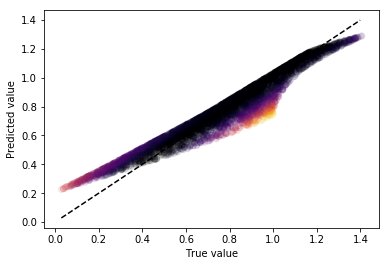

In [7]:
linevals = np.arange(np.min(y_test), np.max(y_test), step = .01)

plt.scatter(y_test, 
            y_pred, 
            c=(y_test - y_pred)**2, 
            alpha=0.1, 
            cmap = 'inferno')
plt.plot(linevals, linevals, 'k--')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

If we wanted a quantitative measure of the model performance, we could use the mean squared error of the test set:

In [8]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.0065778512868064328

### Question 1: 
#### Can you improve the model's performance by changing the neural network structure?

Try to fit a new model that performs better on our test dataset. 
You can play with changing the structure of the network (e.g., the number of hidden layers, and the number of neurons in each hidden layer), and you might also try some different values for the L2 penalty of the weights (the argument `alpha`, which was set to 0 above. 

Change the structure of the network and/or the L2 penalty until you see an increase in performance on the test set.

In [9]:
# your code here

### Question 2: 

#### Performing a grid search over the hyperparameters

In **Question 1**, you improved the model's performance by changing the values of our network's *hyperparameters* (network parameters that are not "learned" per se, but have a strong influence on the model results). 
In fact, there are many choices that we made somewhat arbitrarily, which are fixed and associated with our neural network:

In [10]:
net.get_params()

{'activation': 'relu',
 'alpha': 0,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

But, which values are best? 
A **grid search** tries a range of hyperparameter values, such that all possible combinations of certain hyperparameters are used, and model performance is evaluated for each combination.

To begin with, consider a single hidden layer network with a varying number of neurons in the hidden layer. 
Which value for the number of neurons leads to the best model performance?
Note that you can use some scikitlearn functionality to do this (http://scikit-learn.org/stable/modules/grid_search.html), or you can program it yourself!

To visualize your grid search, produce a plot with number of neurons on the x-axis, and mean square error on the test set (that we created above) on the y-axis. 

**Things to ponder**

Is there one best value? 
Are there multiple comparably good values?

In [11]:
# your grid search here


In [12]:
# your visualization here


### Question 3: feature engineering

The neural network has a hard time learning the Pythagorean theorem. 
Can you help it with **feature engineering**? 
In other words, instead of just providing the values of $a$ and $b$ as inputs, are there any functions of $a$ and $b$ that you can think of that may help the model (e.g., would including $a + b$ as a third input help)? 

Fit a new network that includes these "engineered" features. How much better is this model?

In [13]:
# your code here


### Bonus challenge: foreign inputs

So far the neural network has only "seen" or been trained on inputs in the range (0, 1). 
If your network has really *learned* the Pythagorean theorem, then it should perform well outside this range (e.g., when $a = 10$ and $b = 50$). 

Does your model performance change when considering inputs that are outside of the range (0, 1)? 
If so, how much does it change? 
Does it perform better or worse?

In [ ]:
# your code here
